in this repo we will create the codes for 
inferencing with the two headed custom model that we created

In [1]:
from ultralytics import YOLO
import torch

# Modify the face model

In [2]:
face_model = YOLO("/mnt/d/ultralytics/runs/detect/train/train2/weights/best.pt")

باید عدد و آیدی بخش 
کله مدل رو، یک دونه ببریم بالاتر

In [3]:
# برای ذخیره کردن معماری جدید

new_state_dict = dict()

for k, v in face_model.state_dict().items():
  if k.startswith("model.model.22"):
    new_state_dict[k.replace("model.22", "model.23")] = v

حالا ما یه مدل داریم، که یه کله جدید داره که شمارش 23 هست!

In [4]:
torch.save(new_state_dict, "yolov8n_face.pth")

ابتدا معماری مدل رو لود میکنیم، و وزن های عادی رو هم لود میکنیم

In [5]:
model_2 = YOLO('/mnt/d/ultralytics/ultralytics/cfg/models/custom_models/yolov8n-2xhead.yaml', task="detect").load('yolov8n.pt')

Transferred 355/440 items from pretrained weights


باقی پارامتر ها، از مدل جدیدی که روی تشخیص صورت آموزش دیده لود خواهد شد

In [6]:
model_2.state_dict().keys()
# وزن های مدل صورت
state_dict = torch.load("yolov8n_face.pth")

In [7]:
state_dict.keys()

dict_keys(['model.model.23.cv2.0.0.conv.weight', 'model.model.23.cv2.0.0.bn.weight', 'model.model.23.cv2.0.0.bn.bias', 'model.model.23.cv2.0.0.bn.running_mean', 'model.model.23.cv2.0.0.bn.running_var', 'model.model.23.cv2.0.0.bn.num_batches_tracked', 'model.model.23.cv2.0.1.conv.weight', 'model.model.23.cv2.0.1.bn.weight', 'model.model.23.cv2.0.1.bn.bias', 'model.model.23.cv2.0.1.bn.running_mean', 'model.model.23.cv2.0.1.bn.running_var', 'model.model.23.cv2.0.1.bn.num_batches_tracked', 'model.model.23.cv2.0.2.weight', 'model.model.23.cv2.0.2.bias', 'model.model.23.cv2.1.0.conv.weight', 'model.model.23.cv2.1.0.bn.weight', 'model.model.23.cv2.1.0.bn.bias', 'model.model.23.cv2.1.0.bn.running_mean', 'model.model.23.cv2.1.0.bn.running_var', 'model.model.23.cv2.1.0.bn.num_batches_tracked', 'model.model.23.cv2.1.1.conv.weight', 'model.model.23.cv2.1.1.bn.weight', 'model.model.23.cv2.1.1.bn.bias', 'model.model.23.cv2.1.1.bn.running_mean', 'model.model.23.cv2.1.1.bn.running_var', 'model.model.2

In [8]:
model_2.load_state_dict(state_dict, strict=False)

_IncompatibleKeys(missing_keys=['model.model.0.conv.weight', 'model.model.0.bn.weight', 'model.model.0.bn.bias', 'model.model.0.bn.running_mean', 'model.model.0.bn.running_var', 'model.model.1.conv.weight', 'model.model.1.bn.weight', 'model.model.1.bn.bias', 'model.model.1.bn.running_mean', 'model.model.1.bn.running_var', 'model.model.2.cv1.conv.weight', 'model.model.2.cv1.bn.weight', 'model.model.2.cv1.bn.bias', 'model.model.2.cv1.bn.running_mean', 'model.model.2.cv1.bn.running_var', 'model.model.2.cv2.conv.weight', 'model.model.2.cv2.bn.weight', 'model.model.2.cv2.bn.bias', 'model.model.2.cv2.bn.running_mean', 'model.model.2.cv2.bn.running_var', 'model.model.2.m.0.cv1.conv.weight', 'model.model.2.m.0.cv1.bn.weight', 'model.model.2.m.0.cv1.bn.bias', 'model.model.2.m.0.cv1.bn.running_mean', 'model.model.2.m.0.cv1.bn.running_var', 'model.model.2.m.0.cv2.conv.weight', 'model.model.2.m.0.cv2.bn.weight', 'model.model.2.m.0.cv2.bn.bias', 'model.model.2.m.0.cv2.bn.running_mean', 'model.model

 تست مدل عادی

In [9]:
# Output of COCO model
model_coco = YOLO("yolov8n.pt")

# For consistency
model_coco.model.names = {k:k for k in model_coco.names.keys()}

result_coco = model_coco.predict("IMG_9528.JPG")[0]


image 1/1 /mnt/d/ultralytics/examples/IMG_9528.JPG: 640x448 2 0s, 201.5ms
Speed: 14.3ms preprocess, 201.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


تست مدل صورت به تنهایی


In [10]:
# Output of custom LP model
model_face = YOLO("/mnt/d/ultralytics/runs/detect/train/train2/weights/best.pt")


result_face = model_face.predict("IMG_9528.JPG")[0]


image 1/1 /mnt/d/ultralytics/examples/IMG_9528.JPG: 640x448 1 face, 167.5ms
Speed: 4.2ms preprocess, 167.5ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 448)


تست خروجی مدل جدید خودمون
//
ترکیب هر دو مدل 

In [11]:
# Output of the new model
result_merged = model_2.predict("IMG_9528.JPG")[0]


image 1/1 /mnt/d/ultralytics/examples/IMG_9528.JPG: 640x448 2 0s, 1 80, 200.8ms
Speed: 3.2ms preprocess, 200.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


مقایسه سه مدل

In [12]:
import matplotlib.pyplot as plt
import numpy as np

In [13]:
def show_output(images):
    image = np.vstack(images)
    fig = plt.figure()
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    fig.set_size_inches((5,15))
    ax.imshow(image[...,::-1])

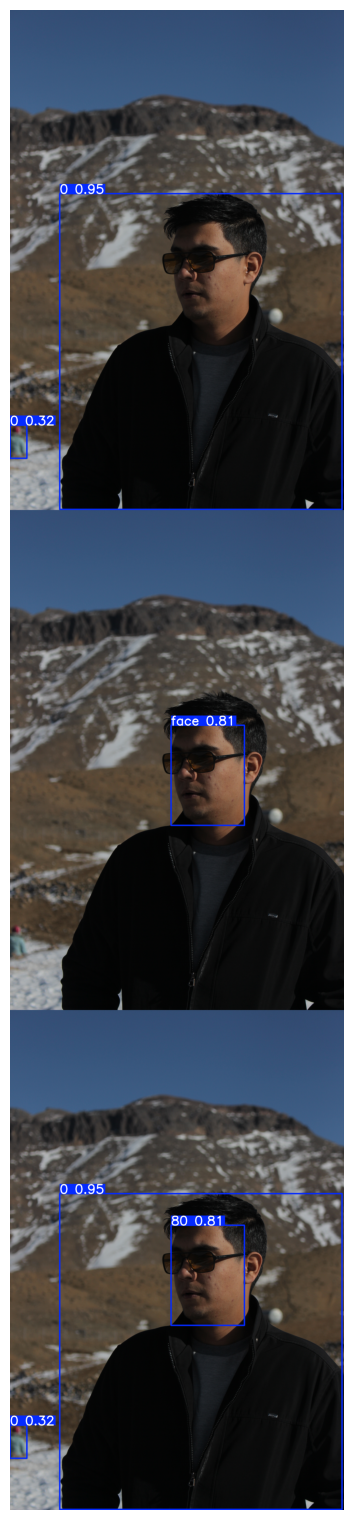

In [14]:
show_output([result_coco.plot(), result_face.plot(), result_merged.plot()])